# PHYS 5120: Homework 1 - Pendulum Simulation Report

**Author:** Jesse (Zhaoxiang) Chen
**Date:** 2025-09-14

### **Introduction**

My approach will be to first derive the analytical solution for the linear pendulum. Then, I will implement a numerical solution using the Velocity Verlet method, as required, to compare against the analytical result. Finally, I will apply this numerical method to the nonlinear pendulum, with a focus on analyzing the conservation of energy.

-----

### **1. Setup & Constants**
After *pip install numpy* and *pip install matplotlib* in python environment's terminal like bash (Mine is 3.10.18, also tried 3.11, both are okay).

Then, I'll import the necessary Python libraries—`numpy` for numerical operations and `matplotlib` for plotting. I'll also define the global physical constants provided in the problem statement.

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# --- Physical Constants ---
# Parameters given in the problem
G = 9.81  # Gravitational acceleration (m/s^2)
L = 2.5   # Length of the pendulum arm (m)

# Set a nice plotting style for the figures
plt.style.use('seaborn-v0_8-whitegrid')

### **Part 1: The Linear Pendulum (Analytical Solution)**

#### **1.1 Equation of Motion & Derivation**

For a simple pendulum, the equation of motion comes from the rotational form of Newton's second law, $\tau = I\alpha$.

  * **Torque ($\tau$)**: The restoring torque is provided by the tangential component of gravity, $\tau = -mgl \sin\theta$.
  * **Moment of Inertia ($I$)**: For a point mass, $I = ml^2$.
  * **Angular Acceleration ($\alpha$)**: $\alpha = \ddot{\theta}$.

Combining these gives the general equation for the pendulum: $\ddot{\theta} = -\frac{g}{l} \sin\theta$.
For the linear approximation, we consider small angle oscillations ($\theta \ll 1$), which allows the approximation $\sin\theta \approx \theta$. The equation of motion simplifies to:
$$\ddot{\theta} = -\frac{g}{l} \theta$$

#### **1.2 Period Calculation**

The general solution for is $\theta(t) = A \cos(\omega_0 t + \phi)$, where the angular frequency is $\omega_0 = \sqrt{g/l}$. The period $T$ is related by $T = 2\pi / \omega_0$. Therefore, the period of a linear pendulum is:
$$T = 2\pi \sqrt{\frac{l}{g}}$$
This period depends only on the length of the pendulum.

***[Self-Note]:*** *The statement "This period depends only on the length of the pendulum" isn't entirely accurate. It's true on the surface of the Earth, but strictly speaking, the period $T$ also depends on the gravitational acceleration $g$. A more precise statement would be: "In a given gravitational field ($g$ is constant), the period of a linear pendulum depends only on its length."*

let's calculate.

In [4]:
# Part 1: Calculate the analytical period for the linear pendulum
T_analytical = 2 * np.pi * np.sqrt(L / G)
print(f"The analytical period of the linear pendulum is T = {T_analytical:.4f} seconds.")

The analytical period of the linear pendulum is T = 3.1719 seconds.


### **Part 2: Numerical Solution of the Linear Pendulum**

use the Velocity Verlet method.

#### **2.1 The Velocity Verlet Algorithm**

1.  Update position to time $t + \Delta t$: $\theta(t + \Delta t) = \theta(t) + \omega(t)\Delta t + \frac{1}{2}\alpha(t)(\Delta t)^2$
2.  Calculate acceleration at the new position: $\alpha(t + \Delta t) = -\frac{g}{l}\theta(t + \Delta t)$
3.  Update velocity to time $t + \Delta t$: $\omega(t + \Delta t) = \omega(t) + \frac{1}{2}[\alpha(t) + \alpha(t + \Delta t)]\Delta t$

Function:

In [5]:
def run_simulation(theta0_deg, t_max, dt, is_nonlinear=False):
    """
    Runs the pendulum simulation using the Velocity Verlet method.
    
    Args:
        theta0_deg (float): Initial angle in degrees.
        t_max (float): Maximum simulation time in seconds.
        dt (float): Time step in seconds.
        is_nonlinear (bool): If True, use sin(theta). If False, use theta.
        
    Returns:
        A dictionary containing the results: time, theta, energy_per_mass.
    """
    # TODO: I should add 'omega' to the return values and the docstring.
    # It's not required for this homework, but it would be good practice for a general-purpose function.
    
    # 1. Initialization
    theta0_rad = np.deg2rad(theta0_deg)
    num_steps = int(t_max / dt)
    
    t = np.linspace(0, t_max, num_steps + 1)
    theta = np.zeros(num_steps + 1)
    omega = np.zeros(num_steps + 1)
    
    theta[0] = theta0_rad
    omega[0] = 0.0

    # 2. Main integration loop
    for i in range(num_steps):
        # Calculate current acceleration
        if is_nonlinear:
            alpha_t = -(G / L) * np.sin(theta[i])
        else:
            alpha_t = -(G / L) * theta[i]
            
        # Update position
        theta[i+1] = theta[i] + omega[i] * dt + 0.5 * alpha_t * (dt**2)
        
        # Calculate acceleration at the new position
        if is_nonlinear:
            alpha_t_plus_1 = -(G / L) * np.sin(theta[i+1])
        else:
            alpha_t_plus_1 = -(G / L) * theta[i+1]
            
        # Update velocity
        omega[i+1] = omega[i] + 0.5 * (alpha_t + alpha_t_plus_1) * dt

    # 3. Post-processing to calculate energy (for Part 3)
    kinetic_energy_per_mass = 0.5 * (L**2) * (omega**2)
    potential_energy_per_mass = G * L * (1 - np.cos(theta))
    total_energy_per_mass = kinetic_energy_per_mass + potential_energy_per_mass
    
    return {
        "time": t,
        "theta": np.rad2deg(theta), # Convert back to degrees for plotting
        "energy_per_mass": total_energy_per_mass
    }

def analytical_solution(t, theta0_rad):
    """Calculates the analytical solution for the linear pendulum."""
    omega_analytical = np.sqrt(G / L)
    return theta0_rad * np.cos(omega_analytical * t)

#### **2.2 Numerical vs. Analytical Comparison**

Release the pendulum from rest at $2.5^{\circ}$. Choose: $\Delta t = 0.01$ s, and simulate for 5 periods.

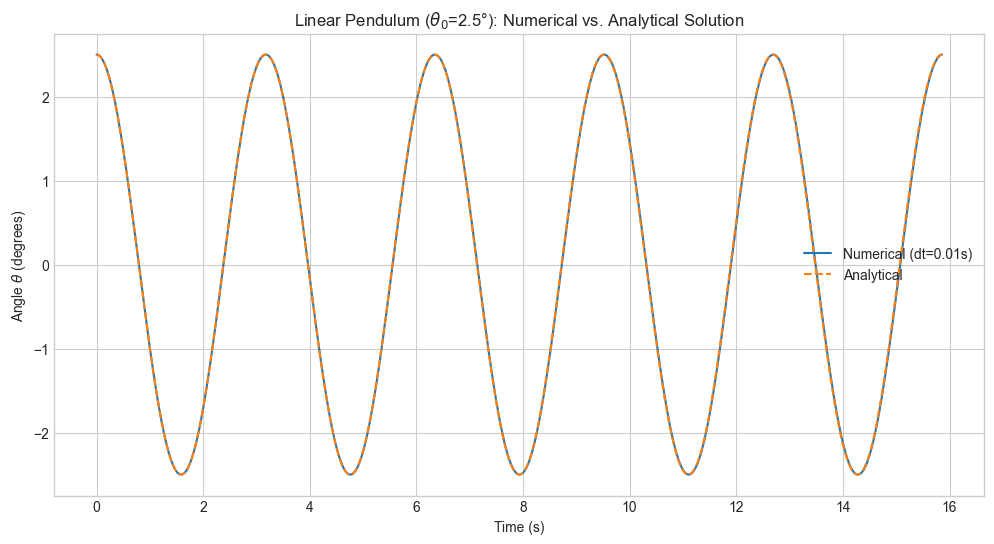

In [6]:
# Part 2: Run the linear simulation and plot the comparison
theta0_linear_deg = 2.5
dt_good = 0.01
sim_time_linear = 5 * T_analytical # Simulate for 5 periods

# Run the simulation
result_linear = run_simulation(theta0_linear_deg, sim_time_linear, dt_good, is_nonlinear=False)

# Calculate the corresponding analytical solution for the same time points
theta_analytical_rad = analytical_solution(result_linear["time"], np.deg2rad(theta0_linear_deg))
theta_analytical_deg = np.rad2deg(theta_analytical_rad)

# Plot the results
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(result_linear["time"], result_linear["theta"], label=f'Numerical (dt={dt_good}s)', linestyle='-')
ax.plot(result_linear["time"], theta_analytical_deg, label='Analytical', linestyle='--')
ax.set_title(f'Linear Pendulum ($\u03B8_0$={theta0_linear_deg}°): Numerical vs. Analytical Solution')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Angle $\u03B8$ (degrees)')
ax.legend()
ax.grid(True)
plt.show()

#### **2.3 Discussion of Results**

As the plot clearly shows, the numerical solution and the analytical solution are nearly indistinguishable when a sufficiently small time step is used. This confirms that my implementation of the Velocity Verlet method is correct and highly accurate for this problem. The minor (and in this case, invisible) difference between the two curves is due to **discretization error**. The analytical solution is continuous and exact, whereas the numerical method approximates the continuous evolution with discrete time steps, introducing a tiny truncation error at each step. For a small enough step size, this error is negligible.

-----

### **Part 3: The Nonlinear Pendulum & Energy Conservation**

Now for the more interesting case: the large-angle, nonlinear pendulum, where the small-angle approximation no longer holds.

#### **3.1 Theoretical Total Energy**

Since gravity is a conservative force and we are ignoring friction, the total mechanical energy $E = E_k + E_p$ of the pendulum must be conserved.

  * Kinetic Energy: $E_k = \frac{1}{2}ml^2\omega^2$
  * Potential Energy: $E_p = mgl(1-\cos\theta)$ (setting $V=0$ at the bottom)

The pendulum is released from rest ($\omega=0$) at an initial angle of $\theta_0 = 125^{\circ}$. At that moment, the total energy is purely potential:
$E_{total} = mgl(1 - \cos\theta_0)$ Since the mass `m` is not given, we can work with the energy per unit mass, $\frac{E_{total}}{m} = gl(1 - \cos\theta_0)$

In [7]:
# Part 3: Calculate the exact total energy for the nonlinear case
theta0_nonlinear_deg = 125.0
exact_energy_per_mass = G * L * (1 - np.cos(np.deg2rad(theta0_nonlinear_deg)))
print(f"Exact Total Energy per unit mass = {exact_energy_per_mass:.4f} J/kg.")

Exact Total Energy per unit mass = 38.5920 J/kg.


#### **3.2 Numerical Simulation & Energy Drift**

The period of a large-angle pendulum is longer than its linear counterpart; I'll estimate it to be around 5 seconds, so a 75-second simulation should be sufficient.

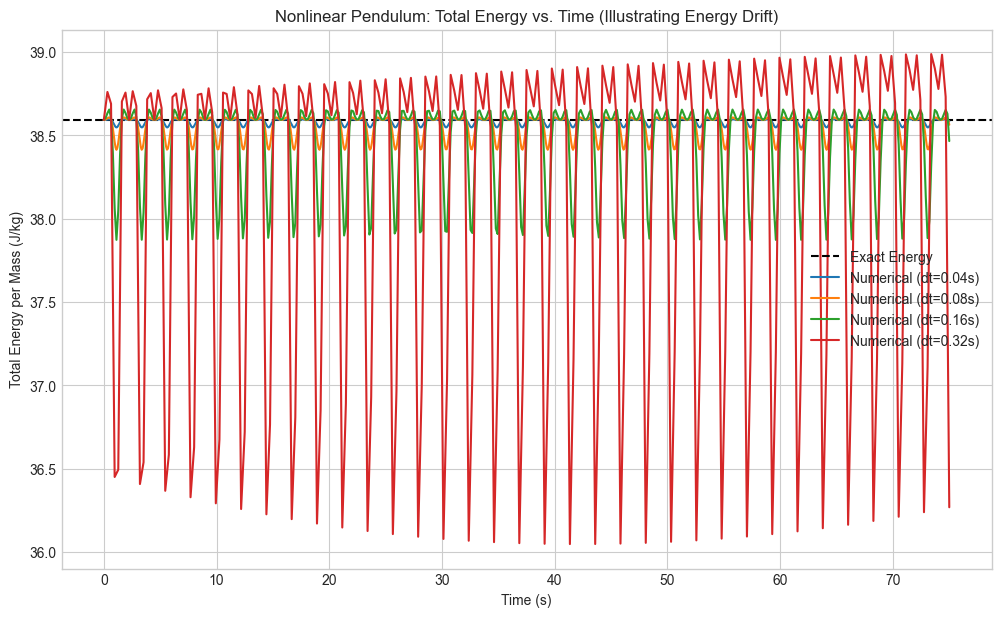

In [8]:
# Part 3: Run nonlinear simulations to observe energy drift
sim_time_nonlinear = 75 # Should be enough for >15 periods

# Set a series of increasing time steps to test
time_steps = [0.04, 0.08, 0.16, 0.32] 

fig, ax = plt.subplots(figsize=(12, 7))

# Plot the exact energy as a horizontal reference line
ax.axhline(y=exact_energy_per_mass, color='black', linestyle='--', label='Exact Energy')

for dt in time_steps:
    result = run_simulation(theta0_nonlinear_deg, sim_time_nonlinear, dt, is_nonlinear=True)
    ax.plot(result["time"], result["energy_per_mass"], label=f'Numerical (dt={dt}s)')

# Style the plot
ax.set_title('Nonlinear Pendulum: Total Energy vs. Time (Illustrating Energy Drift)')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Total Energy per Mass (J/kg)')
ax.legend()
ax.grid(True)
plt.show()

# [Self-Note]: The plot above uses default colors and line styles for all curves,
# which makes them a bit hard to tell apart. For a final report, I should manually specify
# different colors or linestyles for each 'dt' value to improve clarity.
# For example, by adding a color=... or linestyle=... argument inside the plot loop.
# anyway, this is sufficient for now. got no time for that.

#### **3.3 Discussion of Findings**
The plot above clearly demonstrates the concept of energy drift.

  * For a small time step (e.g., `dt=0.04s`), the calculated total energy oscillates within a very narrow band around the exact theoretical value. It does not systematically increase or decrease over the long term, which is a hallmark of the stability of a symplectic integrator like Velocity Verlet.
  * As the time step $\Delta t$ increases (e.g., `dt=0.16s`, `dt=0.32s`), a clear, non-physical trend emerges: the calculated total energy systematically increases over time.This is **energy drift**.
  * This drift is the result of the long-term accumulation of numerical errors. When $\Delta t$ is too large, the error introduced at each step is also larger, and these errors no longer average out but instead accumulate in a biased direction, leading to a violation of the fundamental law of conservation of energy. This highlights a critical trade-off in all numerical simulations: the balance between computational efficiency (larger $\Delta t$) and physical accuracy.

-----

### **Conclusion & Submission Notes**

1.  This report in PDF format.
2.  The Python source code (`.py`) used to generate the results and figure

# Supplement


After working through the simple and nonlinear pendulums in the last assignment, I got curious about more complex behaviors. A pendulum is supposed to be a textbook example of predictable, periodic motion. But what happens when you add external forces, like a periodic push and some friction? I came across a fascinating problem (based on Giodano's *Computational Physics*) that delves into this very question, leading to the realm of **chaos**.

The system is a nonlinear pendulum that also includes a damping force proportional to its angular velocity ($-q\frac{d\theta}{dt}$) and a sinusoidal driving force ($F_D\sin(\Omega_Dt)$). The full equation of motion is:
$$\frac{d^2\theta}{dt^2}=-\frac{g}{l}\sin\theta-q\frac{d\theta}{dt}+F_D\sin(\Omega_Dt)$$

For simplicity, and following the reference, we can set $g=l$, which is equivalent to scaling time by $\sqrt{l/g}$. This simplifies the equation to two first-order differential equations, which are perfect for numerical simulation:
$$
\begin{array}{ll}
\frac{d\omega}{dt}&=-\sin\theta-q\omega+F_D\sin(\Omega_Dt)\\\frac{d\theta}{dt}&=\omega
\end{array}
$$
My goal here is to explore two key aspects of this chaotic system:
1.  How the system's "strange attractor" in phase space is affected by small changes to its parameters.
2.  How the overall behavior (from periodic to chaotic) changes as we vary the driving force, frequency, and damping, using a tool called a **bifurcation diagram**.

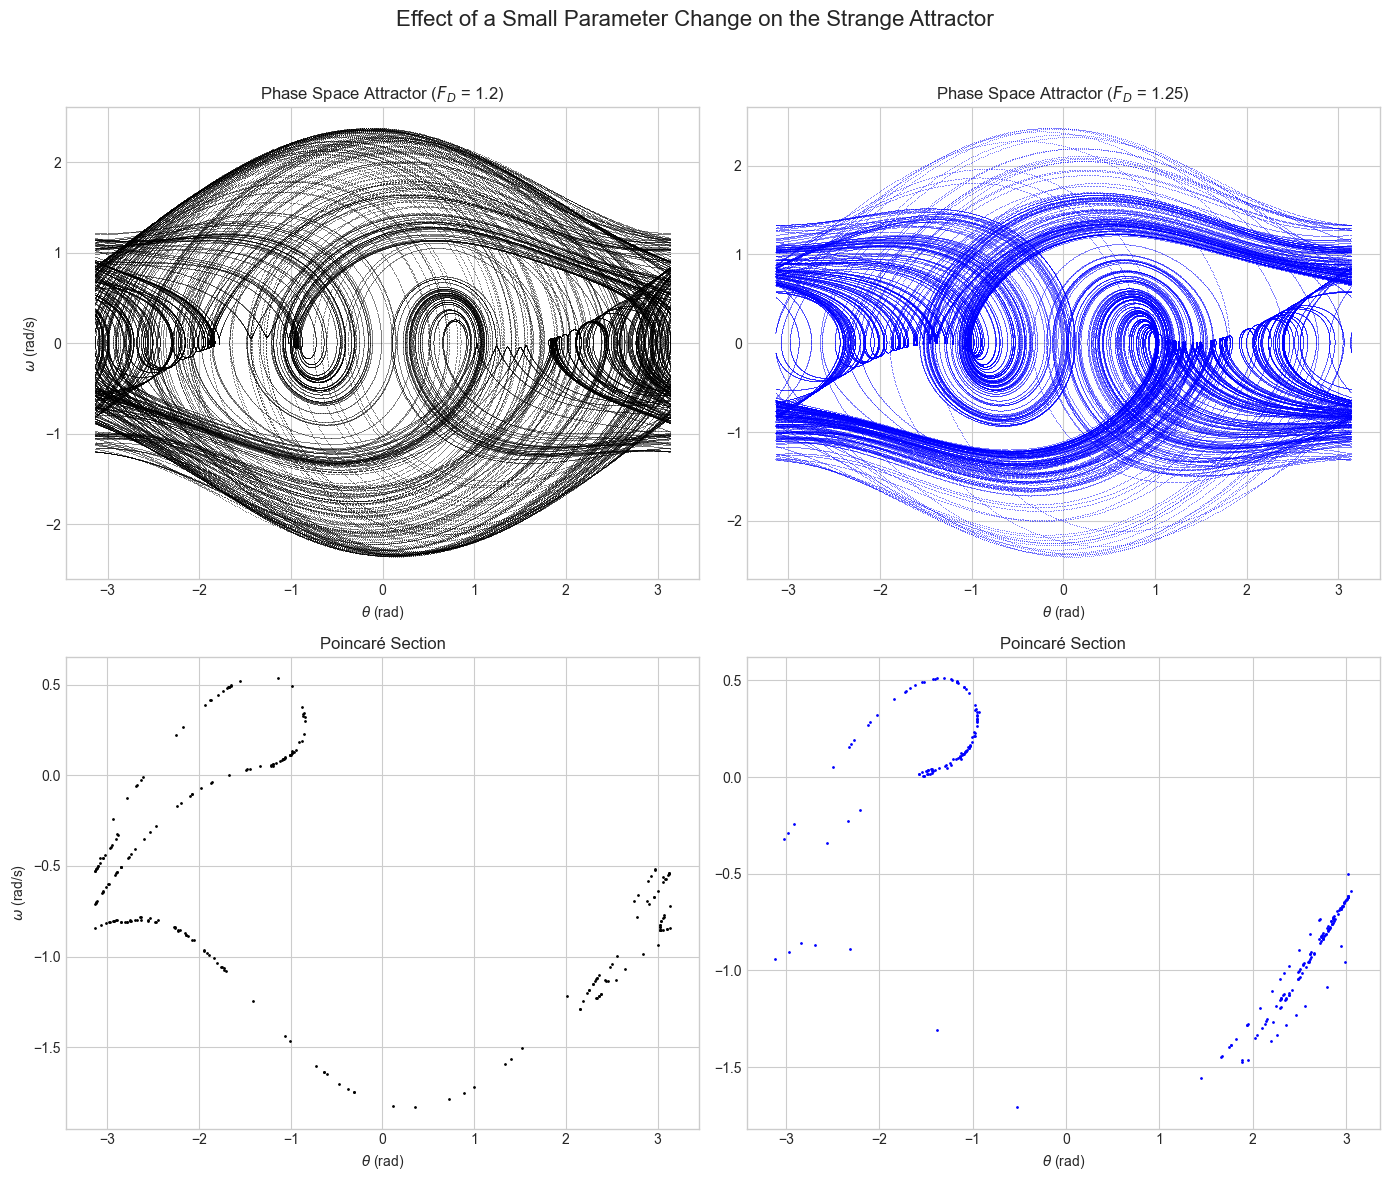

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Set a nice plotting style
plt.style.use('seaborn-v0_8-whitegrid')

def simulate_driven_pendulum(
    F_D,                 # Driving force amplitude
    Omega_D=2./3.,       # Driving frequency
    q=0.5,               # Damping coefficient
    theta0_deg=0.2,      # Initial angle in degrees
    omega0=0.0,          # Initial angular velocity
    total_cycles=200,    # How many drive cycles to simulate
    steps_per_cycle=1000 # Numerical steps per drive cycle
):
    """
    Simulates the driven, damped, nonlinear pendulum using the Euler-Cromer method.
    """
    # 1. Setup simulation parameters
    theta = np.deg2rad(theta0_deg)
    omega = omega0
    
    T_drive = 2 * np.pi / Omega_D  # Period of the driving force
    dt = T_drive / steps_per_cycle
    total_steps = int(total_cycles * steps_per_cycle)
    
    # Arrays to store the results
    theta_vals = np.zeros(total_steps)
    omega_vals = np.zeros(total_steps)
    t_vals = np.zeros(total_steps)
    
    # 2. Main integration loop
    for i in range(total_steps):
        t = i * dt
        
        # Euler-Cromer method
        # First, update angular velocity
        alpha = -np.sin(theta) - q * omega + F_D * np.sin(Omega_D * t)
        omega += alpha * dt
        
        # Then, update angle using the *new* angular velocity
        theta += omega * dt
        
        # Keep theta within [-pi, pi] for cleaner plots
        if theta > np.pi:
            theta -= 2 * np.pi
        elif theta < -np.pi:
            theta += 2 * np.pi
            
        theta_vals[i] = theta
        omega_vals[i] = omega
        t_vals[i] = t
        
    return {"time": t_vals, "theta": theta_vals, "omega": omega_vals, "steps_per_cycle": steps_per_cycle}
# --- Simulation parameters for the strange attractor ---
params = {
    "F_D": 1.2,
    "Omega_D": 2./3.,
    "q": 0.5,
    "total_cycles": 300, # Run for enough time for transients to die out
}

# Run a baseline simulation
result1 = simulate_driven_pendulum(**params)

# Run a second simulation with a slightly different driving force
params_tweaked = params.copy()
params_tweaked["F_D"] = 1.25
result2 = simulate_driven_pendulum(**params_tweaked)

# --- Plotting ---
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('Effect of a Small Parameter Change on the Strange Attractor', fontsize=16)

# --- Column 1: F_D = 1.2 ---
# Plot the full phase space (attractor)
transient_steps = 50 * result1['steps_per_cycle'] # Ignore first 50 cycles
axes[0, 0].plot(result1['theta'][transient_steps:], result1['omega'][transient_steps:], 'k,', alpha=0.5)
axes[0, 0].set_title(f'Phase Space Attractor ($F_D$ = {params["F_D"]})')
axes[0, 0].set_xlabel('$\\theta$ (rad)')
axes[0, 0].set_ylabel('$\\omega$ (rad/s)')

# Plot the Poincaré section
poincare_indices = np.arange(transient_steps, len(result1['theta']), result1['steps_per_cycle'])
axes[1, 0].plot(result1['theta'][poincare_indices], result1['omega'][poincare_indices], 'k.', markersize=2)
axes[1, 0].set_title('Poincaré Section')
axes[1, 0].set_xlabel('$\\theta$ (rad)')
axes[1, 0].set_ylabel('$\\omega$ (rad/s)')

# --- Column 2: F_D = 1.25 ---
# Plot the full phase space (attractor)
axes[0, 1].plot(result2['theta'][transient_steps:], result2['omega'][transient_steps:], 'b,', alpha=0.5)
axes[0, 1].set_title(f'Phase Space Attractor ($F_D$ = {params_tweaked["F_D"]})')
axes[0, 1].set_xlabel('$\\theta$ (rad)')

# Plot the Poincaré section
poincare_indices_2 = np.arange(transient_steps, len(result2['theta']), result2['steps_per_cycle'])
axes[1, 1].plot(result2['theta'][poincare_indices_2], result2['omega'][poincare_indices_2], 'b.', markersize=2)
axes[1, 1].set_title('Poincaré Section')
axes[1, 1].set_xlabel('$\\theta$ (rad)')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Generating diagram for q=0.5, Omega_D=0.67...
Generating diagram for q=0.4, Omega_D=0.67...
Generating diagram for q=0.5, Omega_D=0.50...
Generating diagram for q=0.5, Omega_D=1.00...


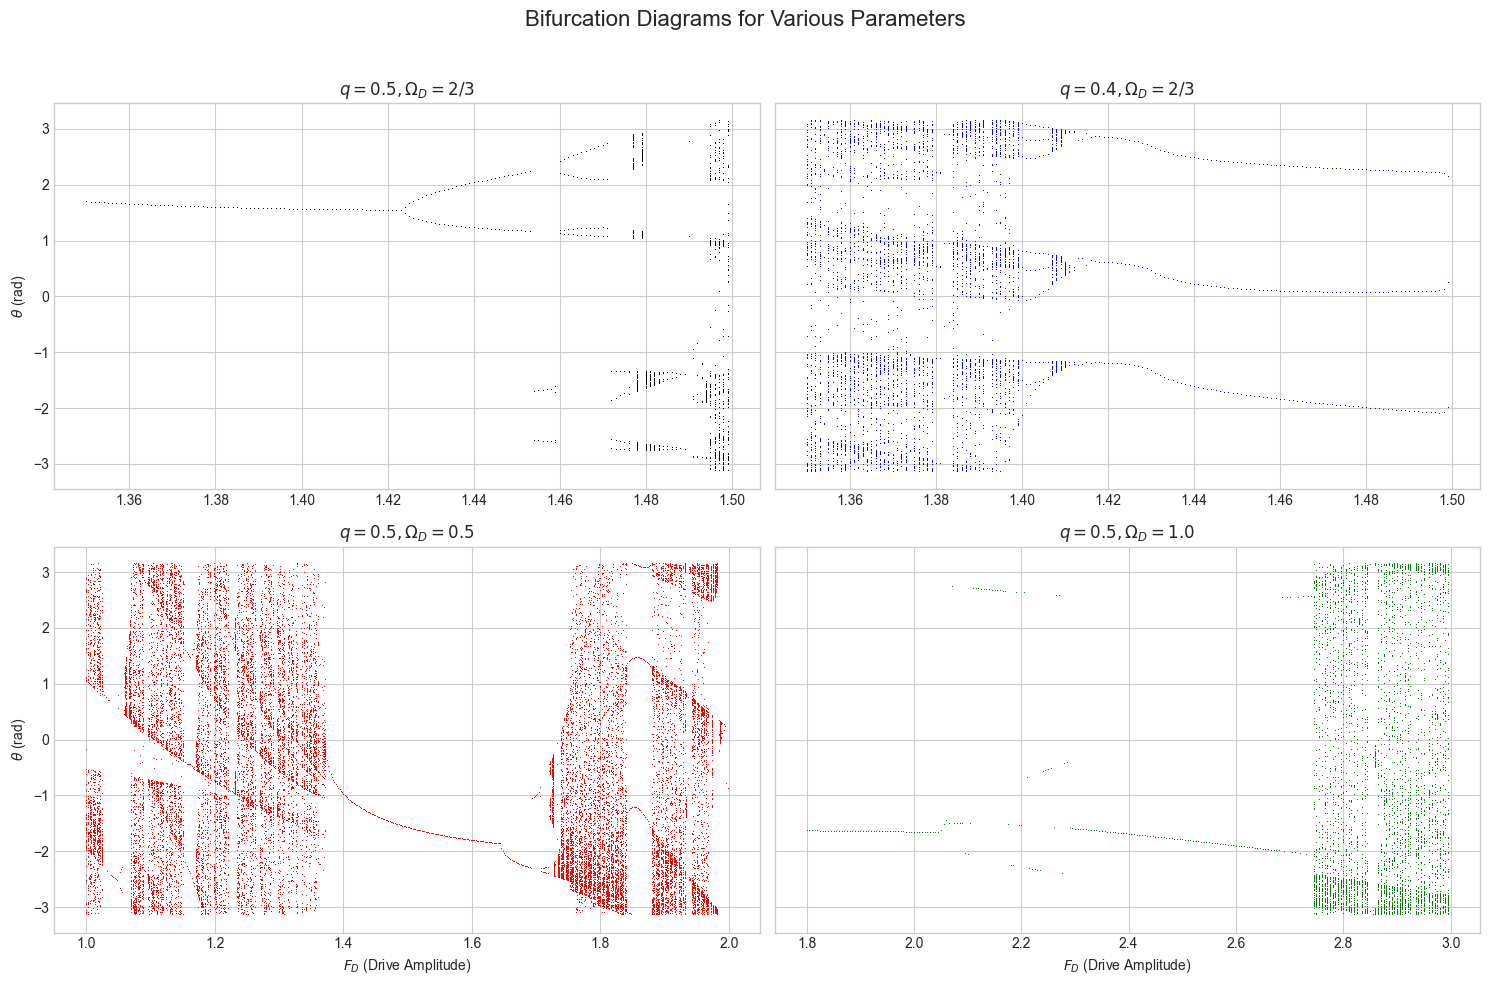

In [10]:
def generate_bifurcation_diagram(
    F_D_range,           # Array of F_D values to scan
    q,                   # Fixed damping
    Omega_D,             # Fixed drive frequency
    cycles_to_settle=300,# Number of cycles to discard for transients
    cycles_to_sample=100 # Number of cycles to sample for the plot
):
    """Generates data for a bifurcation diagram."""
    all_F_D = []
    all_theta = []
    
    # [Self-correction Note]: This loop can be quite slow since it's running many simulations.
    # For a serious project, I might look into parallelizing this using libraries like `multiprocessing`.
    # Also, sampling 100 points feels a bit arbitrary; ensuring I sample for enough cycles to
    # fully map the attractor at that F_D would be more robust.
    
    print(f"Generating diagram for q={q}, Omega_D={Omega_D:.2f}...")
    for F_D in F_D_range:
        # Run a simulation for the current F_D
        sim_data = simulate_driven_pendulum(
            F_D=F_D, q=q, Omega_D=Omega_D,
            total_cycles=(cycles_to_settle + cycles_to_sample)
        )
        
        # Find the indices for the stroboscopic sampling
        start_step = cycles_to_settle * sim_data['steps_per_cycle']
        sample_indices = np.arange(start_step, len(sim_data['theta']), sim_data['steps_per_cycle'])
        
        # Store the results
        sampled_theta = sim_data['theta'][sample_indices]
        all_theta.extend(sampled_theta)
        all_F_D.extend([F_D] * len(sampled_theta))
        
    return all_F_D, all_theta

# --- Generate and Plot Bifurcation Diagrams ---
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=True)
fig.suptitle('Bifurcation Diagrams for Various Parameters', fontsize=16)
F_D_scan = np.arange(1.35, 1.5, 0.001) # A good range to see the transition

# Case 1: Baseline (from reference)
F_D_vals, theta_vals = generate_bifurcation_diagram(F_D_scan, q=0.5, Omega_D=2./3.)
axes[0, 0].plot(F_D_vals, theta_vals, 'k,')
axes[0, 0].set_title(f'$q=0.5, \\Omega_D=2/3$')
axes[0, 0].set_ylabel('$\\theta$ (rad)')

# Case 2: Different damping
F_D_vals, theta_vals = generate_bifurcation_diagram(F_D_scan, q=0.4, Omega_D=2./3.)
axes[0, 1].plot(F_D_vals, theta_vals, 'b,')
axes[0, 1].set_title(f'$q=0.4, \\Omega_D=2/3$')

# Case 3: Different drive frequency
F_D_scan_2 = np.arange(1.0, 2.0, 0.002) # Different params need a different scan range
F_D_vals, theta_vals = generate_bifurcation_diagram(F_D_scan_2, q=0.5, Omega_D=0.5)
axes[1, 0].plot(F_D_vals, theta_vals, 'r,')
axes[1, 0].set_title(f'$q=0.5, \\Omega_D=0.5$')
axes[1, 0].set_xlabel('$F_D$ (Drive Amplitude)')
axes[1, 0].set_ylabel('$\\theta$ (rad)')

# Case 4: Another drive frequency
F_D_scan_3 = np.arange(1.8, 3.0, 0.005)
F_D_vals, theta_vals = generate_bifurcation_diagram(F_D_scan_3, q=0.5, Omega_D=1.0)
axes[1, 1].plot(F_D_vals, theta_vals, 'g,')
axes[1, 1].set_title(f'$q=0.5, \\Omega_D=1.0$')
axes[1, 1].set_xlabel('$F_D$ (Drive Amplitude)')


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#### **Discussion of Bifurcation**

The diagrams beautifully illustrate the "route to chaos."
* In the baseline case ($q=0.5, \Omega_D=2/3$), we see the classic period-doubling cascade. For $F_D < 1.4$, the motion is periodic. Around $F_D \approx 1.4$, the first bifurcation occurs, and the pendulum now oscillates between two positions. This is followed by more bifurcations until the system enters the chaotic regime, where the points fill large vertical bands.
* **Effect of Damping ($q$)**: Comparing the top two plots, reducing the damping from 0.5 to 0.4 seems to make the system slightly more stable, pushing the onset of chaos to a slightly higher driving force. This makes physical sense, as lower damping means the system has less energy dissipation to counteract the driving force's tendency to induce complex motion.
* **Effect of Drive Frequency ($\Omega_D$)**: Changing the drive frequency has a much more dramatic effect on the diagram's structure. When $\Omega_D=0.5$, the transition to chaos is pushed to a much higher driving force and the structure looks different. At $\Omega_D=1.0$, the chaotic region is shifted again. This shows that the system's behavior is a complex interplay between all of its parameters.
### Conclusion
This was a fascinating detour from simple pendulum models. By adding damping and a driving force, a completely predictable system transforms into one capable of extraordinarily complex, unpredictable, and beautiful behavior. The tools of computational physics, like plotting phase-space attractors and bifurcation diagrams, are essential for visualizing and understanding these chaotic systems, which are analytically intractable. It's a powerful demonstration of how simple, deterministic rules can lead to emergent complexity.